In [1]:
%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker

import seaborn as sns
from functools import reduce

import pandas as pd
import numpy as np

In [2]:
# 2011-12 Season Data
data11_12 = pd.read_csv('SP11-12.csv')
# 2016-17 Season Data
data16_17 = pd.read_csv('SP16-17.csv')

# Cleaning the Data to obtain the rows which have Real Madrid in it
data11_12 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') | (data11_12['AwayTeam'] == 'Real Madrid')]
data16_17 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') | (data16_17['AwayTeam'] == 'Real Madrid')]

# Segeragating the Data/ Removing Unwanted Columns
cols = ['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS','AS','HST','AST','HY','AY','HR','AR']
data11_12 = data11_12[cols]
data16_17 = data16_17[cols]

Text(0, 0.5, 'Goals Conceded')

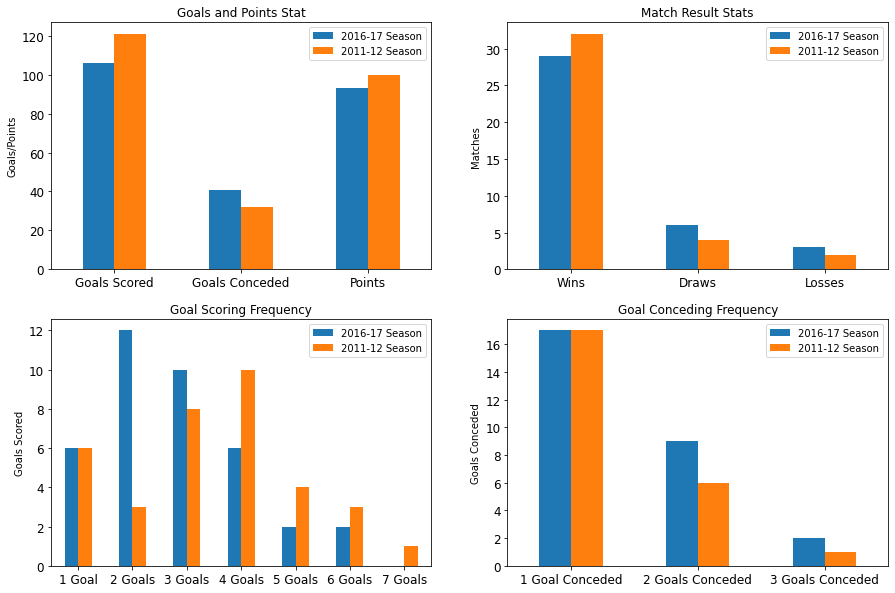

In [27]:
# General Statistics and Analysing the Data

w16_17 = len(data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTR'] == 'H')]) + len(data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid') & (data16_17['FTR'] == 'A')])
w11_12 = len(data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTR'] == 'H')]) + len(data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid') & (data11_12['FTR'] == 'A')])

d16_17 = len(data16_17.loc[((data16_17['HomeTeam'] == 'Real Madrid') | (data16_17['AwayTeam'] == 'Real Madrid')) & (data16_17['FTR'] == 'D')])
d11_12 = len(data11_12.loc[((data11_12['HomeTeam'] == 'Real Madrid') | (data11_12['AwayTeam'] == 'Real Madrid')) & (data11_12['FTR'] == 'D')])

l16_17 = len(data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTR'] == 'A')]) + len(data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid') & (data16_17['FTR'] == 'H')])
l11_12 = len(data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTR'] == 'A')]) + len(data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid') & (data11_12['FTR'] == 'H')])

pts16_17 = (w16_17 * 3) + d16_17
pts11_12 = (w11_12 * 3) + d11_12

goals16_17 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid'),['FTHG']].sum()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid'),['FTAG']].sum()
goals11_12 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid'),['FTHG']].sum()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid'),['FTAG']].sum()

goalsc16_17 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid'),['FTAG']].sum()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid'),['FTHG']].sum()
goalsc11_12 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid'),['FTAG']].sum()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid'),['FTHG']].sum()

shots16_17 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid'),['HS']].sum()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid'),['AS']].sum()
shots11_12 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid'),['HS']].sum()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid'),['AS']].sum()

shotsot16_17 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid'),['HST']].sum()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid'),['AST']].sum()
shotsot11_12 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid'),['HST']].sum()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid'),['AST']].sum()

df = pd.DataFrame(index = ['2016-17 Season','2011-12 Season'])
dfs = df.copy()
dfm = df.copy()
dfs2 = df.copy()
cols = ['Wins','Draws','Losses','Goals Scored','Goals Conceded','Points','Total Shots','Total Shots on Target']
df = df.reindex(columns=list(cols))

df.loc['2016-17 Season']['Wins'] = w16_17
df.loc['2011-12 Season']['Wins'] = w11_12

df.loc['2016-17 Season']['Points'] = pts16_17
df.loc['2011-12 Season']['Points'] = pts11_12

df.loc['2016-17 Season']['Goals Scored'] = goals16_17
df.loc['2011-12 Season']['Goals Scored'] = goals11_12

df.loc['2016-17 Season']['Goals Conceded'] = goalsc16_17
df.loc['2011-12 Season']['Goals Conceded'] = goalsc11_12

df.loc['2016-17 Season']['Losses'] = l16_17
df.loc['2011-12 Season']['Losses'] = l11_12

df.loc['2016-17 Season']['Draws'] = d16_17
df.loc['2011-12 Season']['Draws'] = d11_12

df.loc['2016-17 Season']['Total Shots'] = shots16_17
df.loc['2011-12 Season']['Total Shots'] = shots11_12

df.loc['2016-17 Season']['Total Shots on Target'] = shotsot16_17
df.loc['2011-12 Season']['Total Shots on Target'] = shotsot11_12

df1 = df[['Wins','Draws','Losses']]
df2 = df[['Goals Scored','Goals Conceded','Points']]

df2 = df2.T
df1 = df1.T

fig, axes = plt.subplots(2,2)
df2[['2016-17 Season','2011-12 Season']].plot(kind='bar',figsize=(15,10),fontsize=12,rot=0,title='Goals and Points Stat',ax=axes[0,0])
axes[0,0].set_ylabel('Goals/Points')

df1[['2016-17 Season','2011-12 Season']].plot(kind='bar',figsize=(15,10),fontsize=12,rot=0,title='Match Result Stats',ax=axes[0,1])
axes[0,1].set_ylabel('Matches')


# Goals Scored Pattern

g1_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 1)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 1)].count()[0]
g2_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 2)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 2)].count()[0]
g3_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 3)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 3)].count()[0]
g4_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 4)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 4)].count()[0]
g5_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 5)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 5)].count()[0]
g6_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 6)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 6)].count()[0]
g7_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTHG'] == 7)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTAG'] == 7)].count()[0]

g1_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 1)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 1)].count()[0]
g2_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 2)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 2)].count()[0]
g3_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 3)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 3)].count()[0]
g4_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 4)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 4)].count()[0]
g5_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 5)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 5)].count()[0]
g6_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 6)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 6)].count()[0]
g7_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTHG'] == 7)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTAG'] == 7)].count()[0]

col_score = ['1 Goal','2 Goals','3 Goals','4 Goals','5 Goals','6 Goals','7 Goals']

dfs = dfm.copy()
dfs = dfs.reindex(columns=list(col_score))

dfs.loc['2016-17 Season']['1 Goal'] = g1_16
dfs.loc['2011-12 Season']['1 Goal'] = g1_11

dfs.loc['2016-17 Season']['2 Goals'] = g2_16
dfs.loc['2011-12 Season']['2 Goals'] = g2_11

dfs.loc['2016-17 Season']['3 Goals'] = g3_16
dfs.loc['2011-12 Season']['3 Goals'] = g3_11

dfs.loc['2016-17 Season']['4 Goals'] = g4_16
dfs.loc['2011-12 Season']['4 Goals'] = g4_11


dfs.loc['2016-17 Season']['5 Goals'] = g5_16
dfs.loc['2011-12 Season']['5 Goals'] = g5_11

dfs.loc['2016-17 Season']['6 Goals'] = g6_16
dfs.loc['2011-12 Season']['6 Goals'] = g6_11

dfs.loc['2016-17 Season']['7 Goals'] = g7_16
dfs.loc['2011-12 Season']['7 Goals'] = g7_11

dfs = dfs.T
dfs[['2016-17 Season','2011-12 Season']].plot(kind='bar',figsize=(15,10),fontsize=12,rot=0,title='Goal Scoring Frequency',ax=axes[1,0])
axes[1,0].set_ylabel('Goals Scored')


# Goals Conceded Pattern

gc1_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTAG'] == 1)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTHG'] == 1)].count()[0]
gc2_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTAG'] == 2)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTHG'] == 2)].count()[0]
gc3_16 = data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid') & (data16_17['FTAG'] == 3)].count()[0] + data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid')& (data16_17['FTHG'] == 3)].count()[0]

gc1_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTAG'] == 1)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTHG'] == 1)].count()[0]
gc2_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTAG'] == 2)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTHG'] == 2)].count()[0]
gc3_11 = data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid') & (data11_12['FTAG'] == 3)].count()[0] + data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid')& (data11_12['FTHG'] == 3)].count()[0]


dfc = dfm.copy()

cols_conc = ['1 Goal Conceded','2 Goals Conceded','3 Goals Conceded']
dfc = dfc.reindex(columns=list(cols_conc))

dfc.loc['2016-17 Season']['1 Goal Conceded'] = gc1_16
dfc.loc['2011-12 Season']['1 Goal Conceded'] = gc1_11

dfc.loc['2016-17 Season']['2 Goals Conceded'] = gc2_16
dfc.loc['2011-12 Season']['2 Goals Conceded'] = gc2_11

dfc.loc['2016-17 Season']['3 Goals Conceded'] = gc3_16
dfc.loc['2011-12 Season']['3 Goals Conceded'] = gc3_11

dfc = dfc.T
dfc[['2016-17 Season','2011-12 Season']].plot(kind='bar',figsize=(15,10),fontsize=12,rot=0,title='Goal Conceding Frequency',ax=axes[1,1])
axes[1,1].set_ylabel('Goals Conceded')

In [28]:
data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid'), 'GD'] = data16_17['FTHG'] - data16_17['FTAG'] 
data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid'), 'GD'] = data16_17['FTAG'] - data16_17['FTHG'] 

data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid'), 'GD'] = data11_12['FTHG'] - data11_12['FTAG'] 
data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid'), 'GD'] = data11_12['FTAG'] - data11_12['FTHG'] 

In [29]:
# Creating a DataFrame to score the Goal Difference 
# It is chosen as it not only evaluates the wins and losses but also the margin of the result.
ndf = pd.DataFrame()
ndf['GD'] = data16_17['GD']

In [30]:
ndf['GD2'] = data11_12['GD'].values

In [31]:
data16_17.loc[(data16_17['HomeTeam'] == 'Real Madrid'), 'GD'] = data16_17['FTHG'] - data16_17['FTAG'] 
data16_17.loc[(data16_17['AwayTeam'] == 'Real Madrid'), 'GD'] = data16_17['FTAG'] - data16_17['FTHG'] 

data11_12.loc[(data11_12['HomeTeam'] == 'Real Madrid'), 'GD'] = data11_12['FTHG'] - data11_12['FTAG'] 
data11_12.loc[(data11_12['AwayTeam'] == 'Real Madrid'), 'GD'] = data11_12['FTAG'] - data11_12['FTHG'] 


ndf.index = data16_17.index
ndf = pd.DataFrame()
ndf['GD'] = data16_17['GD']
ndf['GD2'] = data11_12['GD'].values
ndf.reset_index()
ndf = ndf[['GD','GD2']]
ndf.reset_index()
ndf['Ind'] = np.arange(1,39)
ndf = ndf[['Ind','GD','GD2']]

In [32]:
### piio(data16_17['GD'])
# plt.gca().spines['bottom'].set_position(('data',0))

In [33]:
#y = ndf['GD']
#x = np.arange(1,39)
#plt.scatter(x,y)
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r--")

In [34]:
#y = ndf['GD2']
#x = ndf['Ind']
#plt.scatter(x,y)
#z = np.polyfit(x, y, 1)
#p = np.poly1d(z)
#plt.plot(x,p(x),"r-")

In [35]:
#ndf[['GD2','GD']].plot(kind='line',figsize=(15,10),fontsize=12,rot=0,title='GD')

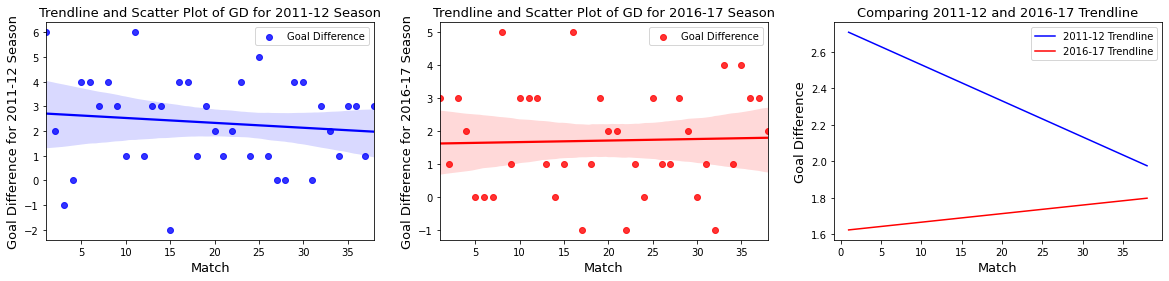

In [40]:
# Plotting the Visualisations to compare the two seasons using a trendline

fig, axes = plt.subplots(1,3,figsize=(20,4))


sns.regplot(x='Ind',y='GD2',data=ndf, color='blue',fit_reg=True,ax=axes[0],label = 'Goal Difference') 

sns.regplot(x='Ind',y='GD',data=ndf, color='red',fit_reg=True,ax=axes[1],label = 'Goal Difference') 



y1 = ndf['GD2']
x1 = ndf['Ind']
#plt.scatter(x1,y1,color='white',label=None)
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
b = plt.plot(x1,p(x1),"r-",color='blue',label = '2011-12 Trendline')

y = ndf['GD']
x = np.arange(1,39)
#plt.scatter(x,y,color='white',label=None)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
a = plt.plot(x,p(x),"r-",color='red',label = '2016-17 Trendline') 
 

axes[0].set_ylabel('Goal Difference for 2011-12 Season',fontsize=13)
axes[0].set_xlabel('Match',fontsize=13)
axes[0].set_title('Trendline and Scatter Plot of GD for 2011-12 Season',fontsize=13)
axes[0].legend()

axes[1].set_ylabel('Goal Difference for 2016-17 Season',fontsize=13)
axes[1].set_xlabel('Match',fontsize=13)
axes[1].set_title('Trendline and Scatter Plot of GD for 2016-17 Season',fontsize=13)
axes[1].legend()

axes[2].set_ylabel('Goal Difference',fontsize=13)
axes[2].set_xlabel('Match',fontsize=13)
axes[2].set_title('Comparing 2011-12 and 2016-17 Trendline',fontsize=13)
axes[2].legend()

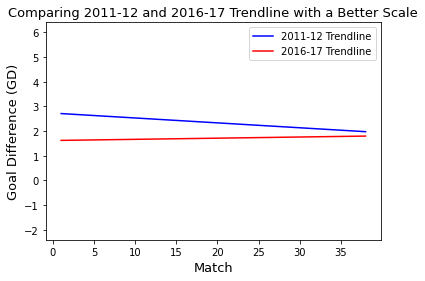

In [41]:
y1 = ndf['GD2']
x1 = ndf['Ind']
plt.scatter(x1,y1,color='white',label=None)
z = np.polyfit(x1, y1, 1)
p = np.poly1d(z)
b = plt.plot(x1,p(x1),"r-",color='blue',label = '2011-12 Trendline')

y = ndf['GD']
x = np.arange(1,39)
plt.scatter(x,y,color='white',label=None)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
a = plt.plot(x,p(x),"r-",color='red',label = '2016-17 Trendline') 
 

plt.ylabel('Goal Difference (GD)',fontsize=13)
plt.xlabel('Match',fontsize=13)
plt.title('Comparing 2011-12 and 2016-17 Trendline with a Better Scale',fontsize=13)
plt.legend()
#fig.savefig('Real Madrid Analysis.png')

## Conculding Note

In Conclusion we can say that the 2011-12(Manager: Jose Mourinho), as the stats suggest were overall the better team when compared to the 2016-17(Manager: Zinedine Zidane) team. Mourinho's team did start declining towards the end, but because their start was exceptionally good (averging a Goal Ratio of over 2.5) the decline looks more steeper than it actually is. On the other hand, Zidane's Madrid were consistent over the full season.